In [1]:
import capnp
import codecs
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import statistics
import time

capnp.remove_import_hook()
interface_capnp = capnp.load("../cpp-tool/capnproto/interface.capnp", imports=["/usr/local/include"])

kj/filesystem-disk-unix.c++:1690: warning: PWD environment variable doesn't match current directory; pwd = /root/.vscode-server/bin/e8a3071ea4344d9d48ef8a4df2c097372b0c5161


In [2]:
client = capnp.TwoPartyClient("cpp-tool:21654")
processDataUpdates = client.bootstrap().cast_as(interface_capnp.ProcessDataUpdates)

In [3]:
!capnp convert json:binary ../cpp-tool/capnproto/interface.capnp RuleModel < performanceModel.json > /tmp/performanceModel.bin
with open("/tmp/performanceModel.bin", "rb") as file:
    model = interface_capnp.RuleModel.read(file)
print(processDataUpdates.modelToString(model).wait().string)

IF light1 = red THEN light2 IN {red}
IF light2 = green THEN output IN [0.000000, 10.000000]
IF light2 = yellow THEN DELTA output IN [12.000000, 15.000000]
IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light2: yellow -> red THEN output = output_prev - 7.000000



# Measuring runtime of the search

In [4]:
numberOfTraces = []
runtimes = []
for numTraces in range(100, 2000, 200):
    eventLogPromise = processDataUpdates.generateEventLog(model=model, numberOfTraces=numTraces, traceLength=20)
    resolvedEventLogPromise = eventLogPromise.wait()

    startTime = time.time()
    modelPromise = processDataUpdates.findModel(resolvedEventLogPromise.log, maxLength=5)
    foundModel = modelPromise.wait().model
    endTime = time.time()

    print(processDataUpdates.modelToString(foundModel).wait().string)
    print("========================================================")

    runtimes.append(endTime - startTime)
    numberOfTraces.append(numTraces)

IF light1 = red THEN light2 IN {red}
IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light2 = yellow THEN DELTA output IN [12.000000, 15.000000]
IF light2 = green THEN output IN [0.000000, 10.000000]

IF light1 = red THEN light2 IN {red}
IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light2 = yellow THEN DELTA output IN [12.000000, 15.000000]
IF light2 = green THEN output IN [0.000000, 10.000000]

IF light1 = red THEN light2 IN {red}
IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light2 = yellow THEN DELTA output IN [12.000000, 15.000000]
IF light2 = green THEN output IN [0.000000, 10.000000]

IF light1 = red THEN light2 IN {red}
IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light2 = yellow THEN

# Adding even smaller event logs

In [8]:
for numTraces in range(20, 100, 20):
    eventLogPromise = processDataUpdates.generateEventLog(model=model, numberOfTraces=numTraces, traceLength=20)
    resolvedEventLogPromise = eventLogPromise.wait()

    startTime = time.time()
    modelPromise = processDataUpdates.findModel(resolvedEventLogPromise.log, maxLength=5)
    foundModel = modelPromise.wait().model
    endTime = time.time()

    print(processDataUpdates.modelToString(foundModel).wait().string)
    print("========================================================")

    runtimes.append(endTime - startTime)
    numberOfTraces.append(numTraces)

IF light1 = red THEN light2 IN {red}
IF light1: red -> yellow THEN num = num_prev * 0.901235
IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light2 = yellow THEN DELTA output IN [12.100000, 14.900000]
IF light2 = green THEN output IN [0.100000, 9.900000]

IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light1 = red THEN light2 IN {red}
IF light2 = yellow THEN DELTA output IN [12.000000, 15.000000]
IF light2 = green THEN output IN [0.100000, 10.000000]

IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light1 = red THEN light2 IN {red}
IF light2 = yellow THEN DELTA output IN [12.000000, 15.000000]
IF light2 = green THEN output IN [0.000000, 10.000000]

IF light1: red -> yellow THEN num = num_prev * 0.900000
IF light1 = red THEN light2 IN {red}
IF light2: yellow -> red THEN output = output_prev - 7.000000
IF light2 = yellow THEN 

In [11]:
# put values in the right order
numberOfTraces, runtimes = (list(t) for t in zip(*sorted(zip(numberOfTraces, runtimes))))

# Visualizing trend

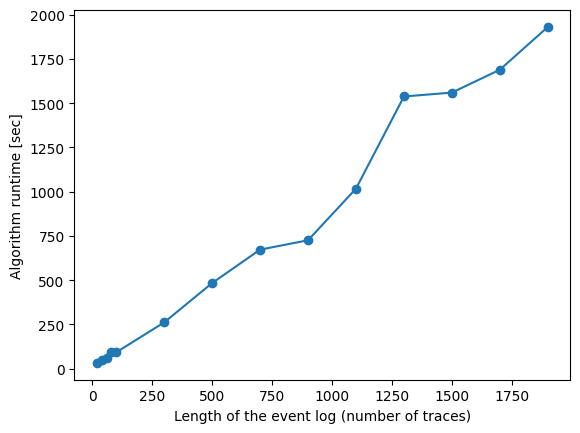

In [14]:
plt.plot(numberOfTraces, runtimes, marker="o")
plt.xlabel("Length of the event log (number of traces)")
plt.ylabel("Algorithm runtime [sec]")
plt.show()

The runtime trend appears to be linear. The deviations from the linear trend are possibly due to the varying environment conditions over time (e.g. battery vs. power adaptor, screen on vs. screen off).

In [15]:
runtimes

[32.630683183670044,
 48.35288453102112,
 60.46951723098755,
 91.75832200050354,
 92.35614705085754,
 261.1507909297943,
 483.4856855869293,
 672.5952703952789,
 725.4645218849182,
 1017.1145579814911,
 1537.742240190506,
 1559.6789956092834,
 1689.0801649093628,
 1930.6814093589783]

In [16]:
numberOfTraces

[20, 40, 60, 80, 100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]